### Add scripts path to the notebook

In [27]:
import sys
import os

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 2\TellCo-Profitability-Opportunity-Analysis\notebooks


### Import Statements

In [76]:
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scripts.database_client import DB_Client
from scipy.stats import skew, kurtosis

### Initialize the DB_client

In [29]:
# obtain values form environment variables
host = os.getenv("DB_HOST")
user_name = os.getenv("DB_USER")
passowrd = os.getenv("DB_PASSWORD")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

In [30]:
db_client = DB_Client(
    host=host,
    user_name=user_name,
    password=passowrd,
    port=port,
    database_name=database
)

### Load the data from the database

In [31]:
data = db_client.dump_data()

d:\KifiyaAIM-Course\Week - 2\TellCo-Profitability-Opportunity-Analysis\scripts\database_client.py:82: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(sql=query, con=self.connection)


Print out basic description of the data

In [32]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Data cleaning

##### Handle Missing values

* Count missing values for each column

In [33]:
data.isna().mean()

Bearer Id                                   0.006607
Start                                       0.000007
Start ms                                    0.000007
End                                         0.000007
End ms                                      0.000007
Dur. (ms)                                   0.000007
IMSI                                        0.003800
MSISDN/Number                               0.007107
IMEI                                        0.003813
Last Location Name                          0.007687
Avg RTT DL (ms)                             0.185525
Avg RTT UL (ms)                             0.185412
Avg Bearer TP DL (kbps)                     0.000007
Avg Bearer TP UL (kbps)                     0.000007
TCP DL Retrans. Vol (Bytes)                 0.587636
TCP UL Retrans. Vol (Bytes)                 0.644322
DL TP < 50 Kbps (%)                         0.005027
50 Kbps < DL TP < 250 Kbps (%)              0.005027
250 Kbps < DL TP < 1 Mbps (%)               0.

We can see that there are columns with a lot of missing data (50% - 86% of the instances), I could drop them now but for the current experiment I want to focus on the columns related to the users and those columns aren't related to user. The columns I want to focus on are:

- Handset Manufacturer
- Bearer Id 
- Start
- Start ms
- End
- End ms
- Dur. (ms)
- Dur. (ms).1
- Dur. (s)

In [34]:
columns_of_interest = ["Handset Type", "Handset Manufacturer", "Bearer Id", "Start", "Start ms", "End", "End ms", "Dur. (ms)", "Dur. (ms).1"]
data[columns_of_interest].isna().mean()

Handset Type            0.003813
Handset Manufacturer    0.003813
Bearer Id               0.006607
Start                   0.000007
Start ms                0.000007
End                     0.000007
End ms                  0.000007
Dur. (ms)               0.000007
Dur. (ms).1             0.000007
dtype: float64

I have decided to drop the missing values found in the given columns because the amount of data we loose is very little

In [35]:
# look for na values in columns except for 'Handset Manufacturer' and 'Bearer Id' and drop the row if it has one na
data.dropna(subset=columns_of_interest, inplace=True)

Let us check the results now

In [36]:
data[columns_of_interest].isna().mean()

Handset Type            0.0
Handset Manufacturer    0.0
Bearer Id               0.0
Start                   0.0
Start ms                0.0
End                     0.0
End ms                  0.0
Dur. (ms)               0.0
Dur. (ms).1             0.0
dtype: float64

##### Handle Duplicate values

* Let us find the amount of duplicate data

In [37]:
duplicate_data = data[data.duplicated()]

In [38]:
duplicate_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)


We can see that there aren't any duplicate data. So nothing to do here

### Exploratory Data Analysis

1) Let us find the top 10 handsets used by the customers 

In [39]:
# group the dataset by the Handset Type column
handset_grouping = data.groupby(by="Handset Type")
# count the rows belonging to each type and then order it in descending order
handset_count = handset_grouping.size().reset_index(name="User Count").sort_values(ascending=False, by="User Count")

In [40]:
# print the top 10 handsets used by the customers
handset_count.head(10)

,Handset Type,User Count
315,Huawei B528S-23A,19752
53,Apple iPhone 6S (A1688),9401
49,Apple iPhone 6 (A1586),9004
1392,undefined,8960
59,Apple iPhone 7 (A1778),6301
73,Apple iPhone Se (A1723),5176
66,Apple iPhone 8 (A1905),4985
78,Apple iPhone Xr (A2105),4562
953,Samsung Galaxy S8 (Sm-G950F),4504
75,Apple iPhone X (A1901),3809


2) Let us find the top 3 handset manufacturers

In [41]:
# group the dataset by the Handset Manufacturer column
manufacturer_grouping = data.groupby(by="Handset Manufacturer")
# count the rows belonging to each manufacturer and then order it in descending order
manufacturer_count = manufacturer_grouping.size().reset_index(name="User Count").sort_values(ascending=False, by="User Count")

In [42]:
manufacturer_count.head(3)

,Handset Manufacturer,User Count
5,Apple,59440
103,Samsung,40689
52,Huawei,34353


3) Let us find the top 3 handsets per top 3 manufacturer

In [43]:
# Step 1: Group the data by 'Handset Manufacturer' and 'Handset Type', and count occurrences
handset_counts = data.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

# Step 2: Get the top 3 manufacturers by total count
top_3_manufacturers = handset_counts.groupby('Handset Manufacturer')['Count'].sum().nlargest(3).index

# Step 3: Filter data for only the top 3 manufacturers
filtered_handset_counts = handset_counts[handset_counts['Handset Manufacturer'].isin(top_3_manufacturers)]

# Step 4: For each manufacturer, get the top 5 handset types
top_handsets_per_manufacturer = filtered_handset_counts.groupby('Handset Manufacturer').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

# Display the result
print(top_handsets_per_manufacturer)


   Handset Manufacturer                    Handset Type  Count
0                 Apple         Apple iPhone 6S (A1688)   9401
1                 Apple          Apple iPhone 6 (A1586)   9004
2                 Apple          Apple iPhone 7 (A1778)   6301
3                 Apple         Apple iPhone Se (A1723)   5176
4                 Apple          Apple iPhone 8 (A1905)   4985
5                Huawei                Huawei B528S-23A  19752
6                Huawei                    Huawei E5180   2079
7                Huawei  Huawei P20 Lite Huawei Nova 3E   2015
8                Huawei                      Huawei P20   1476
9                Huawei                  Huawei Y6 2018    996
10              Samsung    Samsung Galaxy S8 (Sm-G950F)   4504
11              Samsung      Samsung Galaxy A5 Sm-A520F   3716
12              Samsung     Samsung Galaxy J5 (Sm-J530)   3689
13              Samsung     Samsung Galaxy J3 (Sm-J330)   3476
14              Samsung    Samsung Galaxy S7 (Sm-G930X)

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_5224\103669832.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_handsets_per_manufacturer = filtered_handset_counts.groupby('Handset Manufacturer').apply(


##### Interpretation of the results

From the results we can see that:
- Apple iPhones dominate the list of top-used devices, occupying 6 of the top 10 spots. This shows a high penetration of premium devices within the user base. There are a  wide range of models, from older ones like the iPhone 6 and 6S to newer ones like the iPhone Xr, indicates that Apple customers tend to stay with their devices for several years.
- Samsung has a significant presence but is behind Apple in the handset market. Samsung devices like the Galaxy S8 and Galaxy A5 show a focus on mid-range to high-end smartphones, with a considerable user base.
- Huawei B528S-23A leads as the most-used device overall. A simple search for the model shows that it is a mobile broadband router and not a smartphone. This is also true for the Huawei E5180 which is a 4G router. Huawei's smartphones do not perform as strongly as Apple or Samsung, but there is still a notable user base for models like the Huawei P20 Lite and Huawei Y6 2018.

##### Strategic Recommendation for Marketing team

Since Apple users represent a significant portion of the customer base, particularly those using high-end or older iPhones, marketing efforts should focus on offering premium services such as: 
- Bundled services : Provide bundles with Apple-centric services, such as Apple Music, iCloud storage, or AppleCare at a discounted rate for customers using Apple devices.
- Data-heavy plans: Apple users tend to consume more data with apps, video streaming, and social media, so offer premium, high-data plans tailored to their usage habits.

Since most of the top devices we saw for Huawei  were broadband routers marketing efforts should focus on promoting Mobile Broadband Services like:
- Offering bundled promotions for home broadband solutions, including discounts on routers or home internet devices.
- Focus on promoting high-speed mobile broadband plans, especially in regions with limited fixed-line internet infrastructure. Because that is where broadband routers tend to be used.
- Highlight the benefits of unlimited data plans for mobile broadband users who might need connectivity for multiple devices (smartphones, laptops, etc.).

Most of Samsung's devices are devices that are affordable and suitable for people in the middle class. It is better to:
- Create affordable, value-driven plans tailored to Samsung users, focusing on cost-conscious customers who might prefer budget-friendly options.
- Run loyalty programs that offer device upgrades to higher-end Samsung models (e.g., Galaxy S series) with discounted pricing or installment plans.




### User's Behavior Analysis

In [44]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


Since we want to quantify the users behaviour it is better to use IMSI, which identifies the sim card registered/subscribed to the services provider (TellCo).

In [67]:
# grouping the data by IMSI(subscriber identifier)
user_grouping = data.groupby(by="IMSI")

# aggregate the required behaviours
user_behaviour = user_grouping.agg({
    "Bearer Id" : "count",
    "Dur. (ms)": "sum",
    "Total DL (Bytes)": "sum",
    "Total UL (Bytes)": "sum",
    "HTTP DL (Bytes)": "sum",
    "HTTP UL (Bytes)": "sum",
    "Social Media DL (Bytes)": "sum",
    "Social Media UL (Bytes)": "sum",
    "Google DL (Bytes)": "sum",
    "Google UL (Bytes)": "sum",
    "Email DL (Bytes)": "sum",
    "Email UL (Bytes)": "sum",
    "Youtube DL (Bytes)": "sum",
    "Youtube UL (Bytes)": "sum",
    "Netflix DL (Bytes)": "sum",
    "Netflix UL (Bytes)": "sum",
    "Gaming DL (Bytes)": "sum",
    "Gaming UL (Bytes)": "sum",
    "Other DL (Bytes)": "sum",
    "Other UL (Bytes)": "sum"
})

# rename the columns
user_behaviour = user_behaviour.rename(columns={
    "Bearer Id" : "num xDr Sessions",
    "Dur. (ms)" : "Session Duration",
    "Total DL (Bytes)": "Total DL",
    "Total UL (Bytes)": "Total UL",
    "HTTP DL (Bytes)": "Volume DL",
    "HTTP UL (Bytes)": "Volume UL",
})

# obtain the total volume by adding the upload and download volumes
user_behaviour["Volume Total"] = user_behaviour["Volume DL"] + user_behaviour["Volume UL"]

#### Let us perform analsis on the user's aggregated data

* Basic statistics description

In [68]:
user_behaviour.describe()

,num xDr Sessions,Session Duration,Total DL,Total UL,Volume DL,Volume UL,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Volume Total
count,106878.000000,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,106878.000000,1.068780e+05,1.068780e+05,...,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05,1.068780e+05
mean,1.394104,1.463387e+05,6.338797e+08,5.732851e+07,7.329814e+07,2.064574e+06,2.502726e+06,45901.050497,8.018158e+06,2.867038e+06,...,6.516243e+05,1.621766e+07,1.534837e+07,1.620772e+07,1.533892e+07,5.884358e+08,1.155710e+07,5.871146e+08,1.151955e+07,7.536272e+07
std,0.806695,1.865570e+05,4.647958e+08,3.568185e+07,8.266354e+08,1.906684e+07,1.889041e+06,34738.673694,6.067919e+06,2.174137e+06,...,4.950475e+05,1.232950e+07,1.160299e+07,1.232410e+07,1.161503e+07,4.442463e+08,8.737275e+06,4.440513e+08,8.711541e+06,8.381956e+08
min,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,...,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,0.000000e+00
25%,1.000000,7.164225e+04,3.149780e+08,3.639906e+07,0.000000e+00,0.000000e+00,1.175637e+06,21604.500000,3.802412e+06,1.341832e+06,...,3.067090e+05,7.647087e+06,7.246622e+06,7.593318e+06,7.212575e+06,2.794924e+08,5.448900e+06,2.769057e+08,5.460694e+06,0.000000e+00
50%,1.000000,1.028310e+05,5.703787e+08,4.679721e+07,5.200000e+01,0.000000e+00,2.265504e+06,41570.500000,7.257404e+06,2.594389e+06,...,5.874200e+05,1.460300e+07,1.387721e+07,1.463822e+07,1.388172e+07,5.325883e+08,1.044618e+07,5.298911e+08,1.037842e+07,2.320000e+02
75%,2.000000,1.727990e+05,8.074872e+08,6.576010e+07,1.490651e+06,1.841252e+05,3.267690e+06,59925.000000,1.043285e+07,3.744211e+06,...,8.526318e+05,2.112989e+07,1.997921e+07,2.113435e+07,2.001455e+07,7.671541e+08,1.508324e+07,7.653516e+08,1.502938e+07,1.747756e+06
max,18.000000,1.855375e+07,8.156743e+09,7.295774e+08,7.253064e+10,2.224324e+09,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,...,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08,7.302069e+10


**Key Metrics for Network Session Data**
- Mean: Shows average behavior, like typical session duration (146,338 seconds) and data usage. It helps you understand overall network load.
- Median: Highlights typical user behavior, especially in skewed data. For instance, the median session duration (102,831 seconds) suggests most sessions are shorter than the average, signaling a few long sessions skewing the data.
- Standard Deviation: Indicates data variability. High variability in Total DL (463 million bytes) shows that some users consume far more data than others, crucial for network resource planning.
- Min and Max: The range reveals extremes in usage, like the maximum Netflix DL (199 million bytes) or Gaming DL (7.6 billion bytes), pointing to peak bandwidth consumption that strains the network.
- Percentiles: Percentiles divide data into user segments. For example, the 75th percentile of Social Media DL (3.27 million bytes) helps identify heavy users, useful for traffic management.

**Relevance to the Goal**
- Network Load Balancing: Mean and percentiles help estimate typical load, aiding in traffic distribution.
- User Segmentation: Percentiles highlight heavy users for targeted resource allocation or throttling.
- Resource Allocation: Max values guide capacity planning for peak traffic.
- Outlier Detection: High standard deviation and max values can indicate anomalies or extreme usage.

#### None Visual Univariate analysis

Part of the none visual univariate analysis is done above

* **Determining the skewness of the data**

In [77]:
# Calculating skewness for all columns
skewness = user_behaviour.apply(lambda x: skew(x.dropna()), axis=0)

In [78]:
# Display results
print("Skewness:\n", skewness)

Skewness:
 num xDr Sessions            3.352538
Session Duration           20.488562
Total DL                    2.149522
Total UL                    2.894783
Volume DL                  44.002057
Volume UL                  51.784913
Social Media DL (Bytes)     2.066103
Social Media UL (Bytes)     2.015929
Google DL (Bytes)           2.065507
Google UL (Bytes)           2.033219
Email DL (Bytes)            2.100129
Email UL (Bytes)            2.055467
Youtube DL (Bytes)          2.072003
Youtube UL (Bytes)          2.069914
Netflix DL (Bytes)          2.023976
Netflix UL (Bytes)          2.023422
Gaming DL (Bytes)           2.040891
Gaming UL (Bytes)           2.009337
Other DL (Bytes)            1.980367
Other UL (Bytes)            2.031469
Volume Total               43.687542
dtype: float64



Skewness measures the asymmetry of the data distribution. A value of 0 indicates a symmetrical distribution, while positive and negative values signify right and left skewness, respectively. Thus from our resutls we can see that our data is right skeweed.

#### Key Insights:
- **Session Duration (20.49), Volume DL (44.00), Volume UL (51.78)**: These columns show extremely high positive skewness, indicating a heavy concentration of small values and a few extreme outliers.
- **num xDr Sessions (3.35), Total DL (2.15), Total UL (2.89)**: Moderate to high right-skewness, suggesting most values are lower, with some larger values pulling the tail to the right.
- **Social Media DL/UL, Email DL/UL, Youtube DL/UL, Netflix DL/UL**: These columns show moderate skewness (~2), indicating more frequent smaller values with some larger outliers.

In summary, most features exhibit **right-skewed distributions**, where smaller values are dominant, and a few large outliers stretch the distribution. Consider transformation techniques such as logarithmic scaling to normalize the data if needed.


* **Determining the Kurtosis of the data**

In [79]:
# Calculating kurtosis for all columns
kurt = user_behaviour.apply(lambda x: kurtosis(x.dropna()), axis=0)

In [80]:
# Display results
print("Kurtosis:\n", kurt)

Kurtosis:
 num xDr Sessions             20.703952
Session Duration           1232.380013
Total DL                     10.670183
Total UL                     16.573246
Volume DL                  2687.801472
Volume UL                  4308.886242
Social Media DL (Bytes)      11.315316
Social Media UL (Bytes)       9.522447
Google DL (Bytes)            10.015340
Google UL (Bytes)             9.495837
Email DL (Bytes)             10.462630
Email UL (Bytes)              9.858719
Youtube DL (Bytes)           10.003978
Youtube UL (Bytes)           10.451110
Netflix DL (Bytes)            9.231822
Netflix UL (Bytes)            9.405741
Gaming DL (Bytes)             9.854603
Gaming UL (Bytes)             9.300559
Other DL (Bytes)              8.808698
Other UL (Bytes)              9.601807
Volume Total               2654.751570
dtype: float64


### Kurtosis Interpretation

Kurtosis measures the "tailedness" of the distribution. Which describes the thicness or heaviness of the tails of a distribution. A normal distribution has a kurtosis of 3. Higher values indicate heavy tails (leptokurtic), while lower values suggest light tails (platykurtic).

#### Key Insights:
- **Session Duration (1232.38), Volume DL (2687.80), Volume UL (4308.89)**: Extremely high kurtosis indicates significant outliers, meaning these distributions are highly peaked with heavy tails.
- **num xDr Sessions (20.70), Total DL (10.67), Total UL (16.57)**: High kurtosis shows heavy tails, implying outliers and infrequent extreme values.
- **Social Media DL/UL, Email DL/UL, Youtube DL/UL, Netflix DL/UL**: Moderate kurtosis (~9-11), suggesting some degree of heavy tails, but less extreme than the first group.
  
In summary, most features show **leptokurtic distributions**, implying that there are more extreme values (outliers) than would be expected under a normal distribution. These outliers may need special consideration during data preprocessing.


#### Visual Univariate analysis

* Let us create box plots for all the behaviours

In [70]:
# const that determines the amount of cols
NUM_COLS =  3

# calculate the amount of rows in the plot
num_rows = math.ceil(len(user_behaviour.columns) / NUM_COLS)

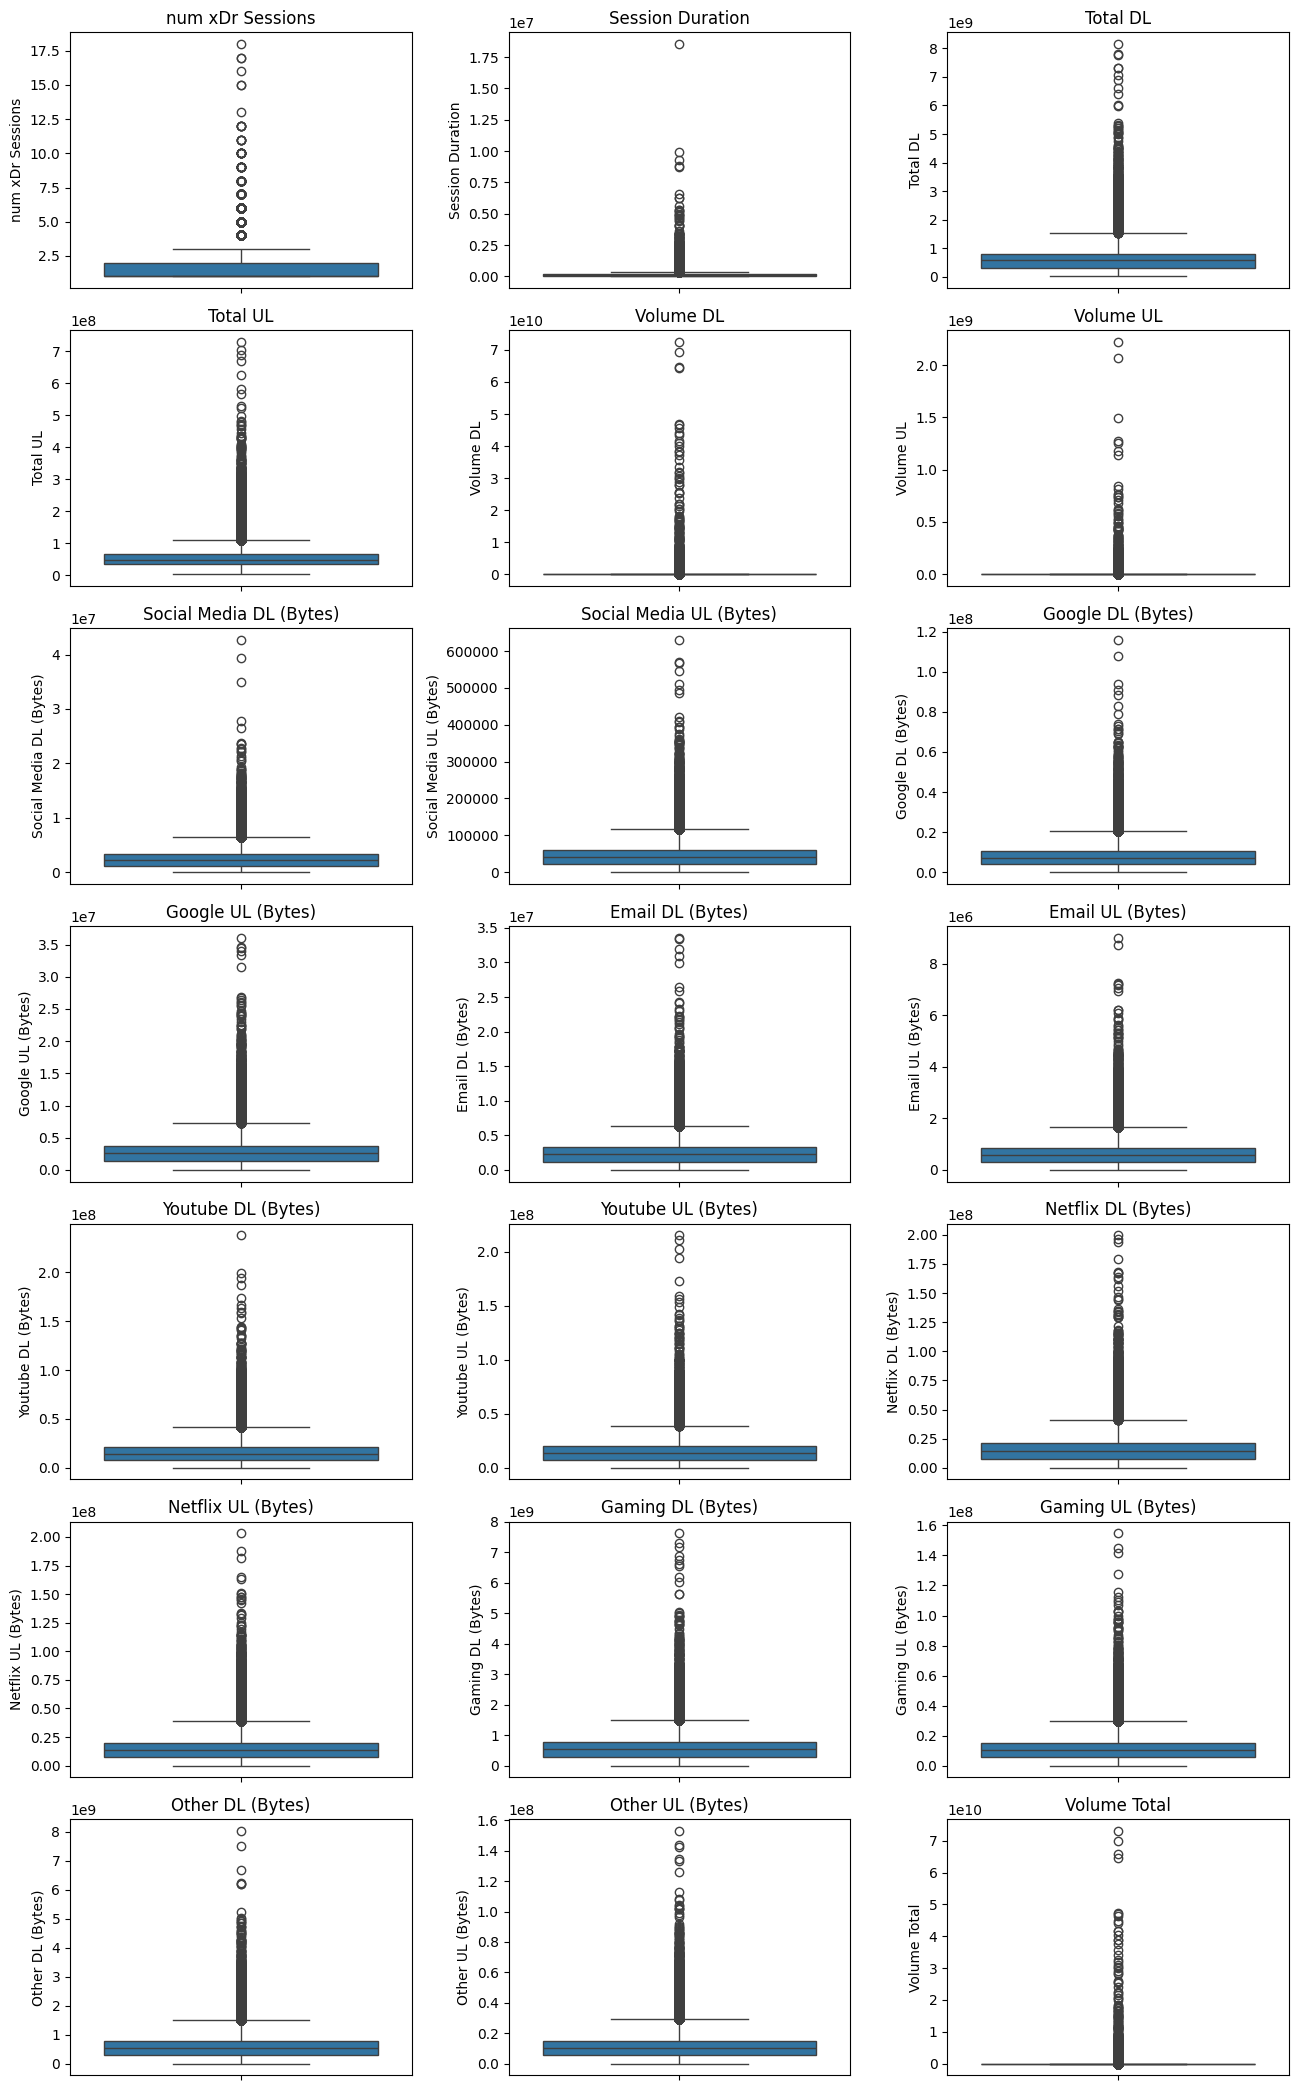

In [74]:
# Create subplots for drawing the box plots on one axis/image
fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, figsize=(13, num_rows * 3))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through columns to create box plots
for idx, col_name in enumerate(user_behaviour.columns):
    if col_name in user_behaviour.columns:
        sns.boxplot(data=user_behaviour[col_name].astype(float), ax=axes[idx], orient='v')
        axes[idx].set_title(col_name)
    else:
        axes[idx].set_visible(False)  # Hide unused subplots

# Adjust spacing between subplots
plt.tight_layout()

We can see from the box plots that our data, pretty much every column , is skewed to the right. Which also confirms our non visualistic univariate analysis. This shows that our data doesn't follow a normal distribution and for our user behaviours most of our users have moderate usage for any metric and some skew that metric to give an illusion that on average a user has longer session a higher download amount/volume and the like.

* 

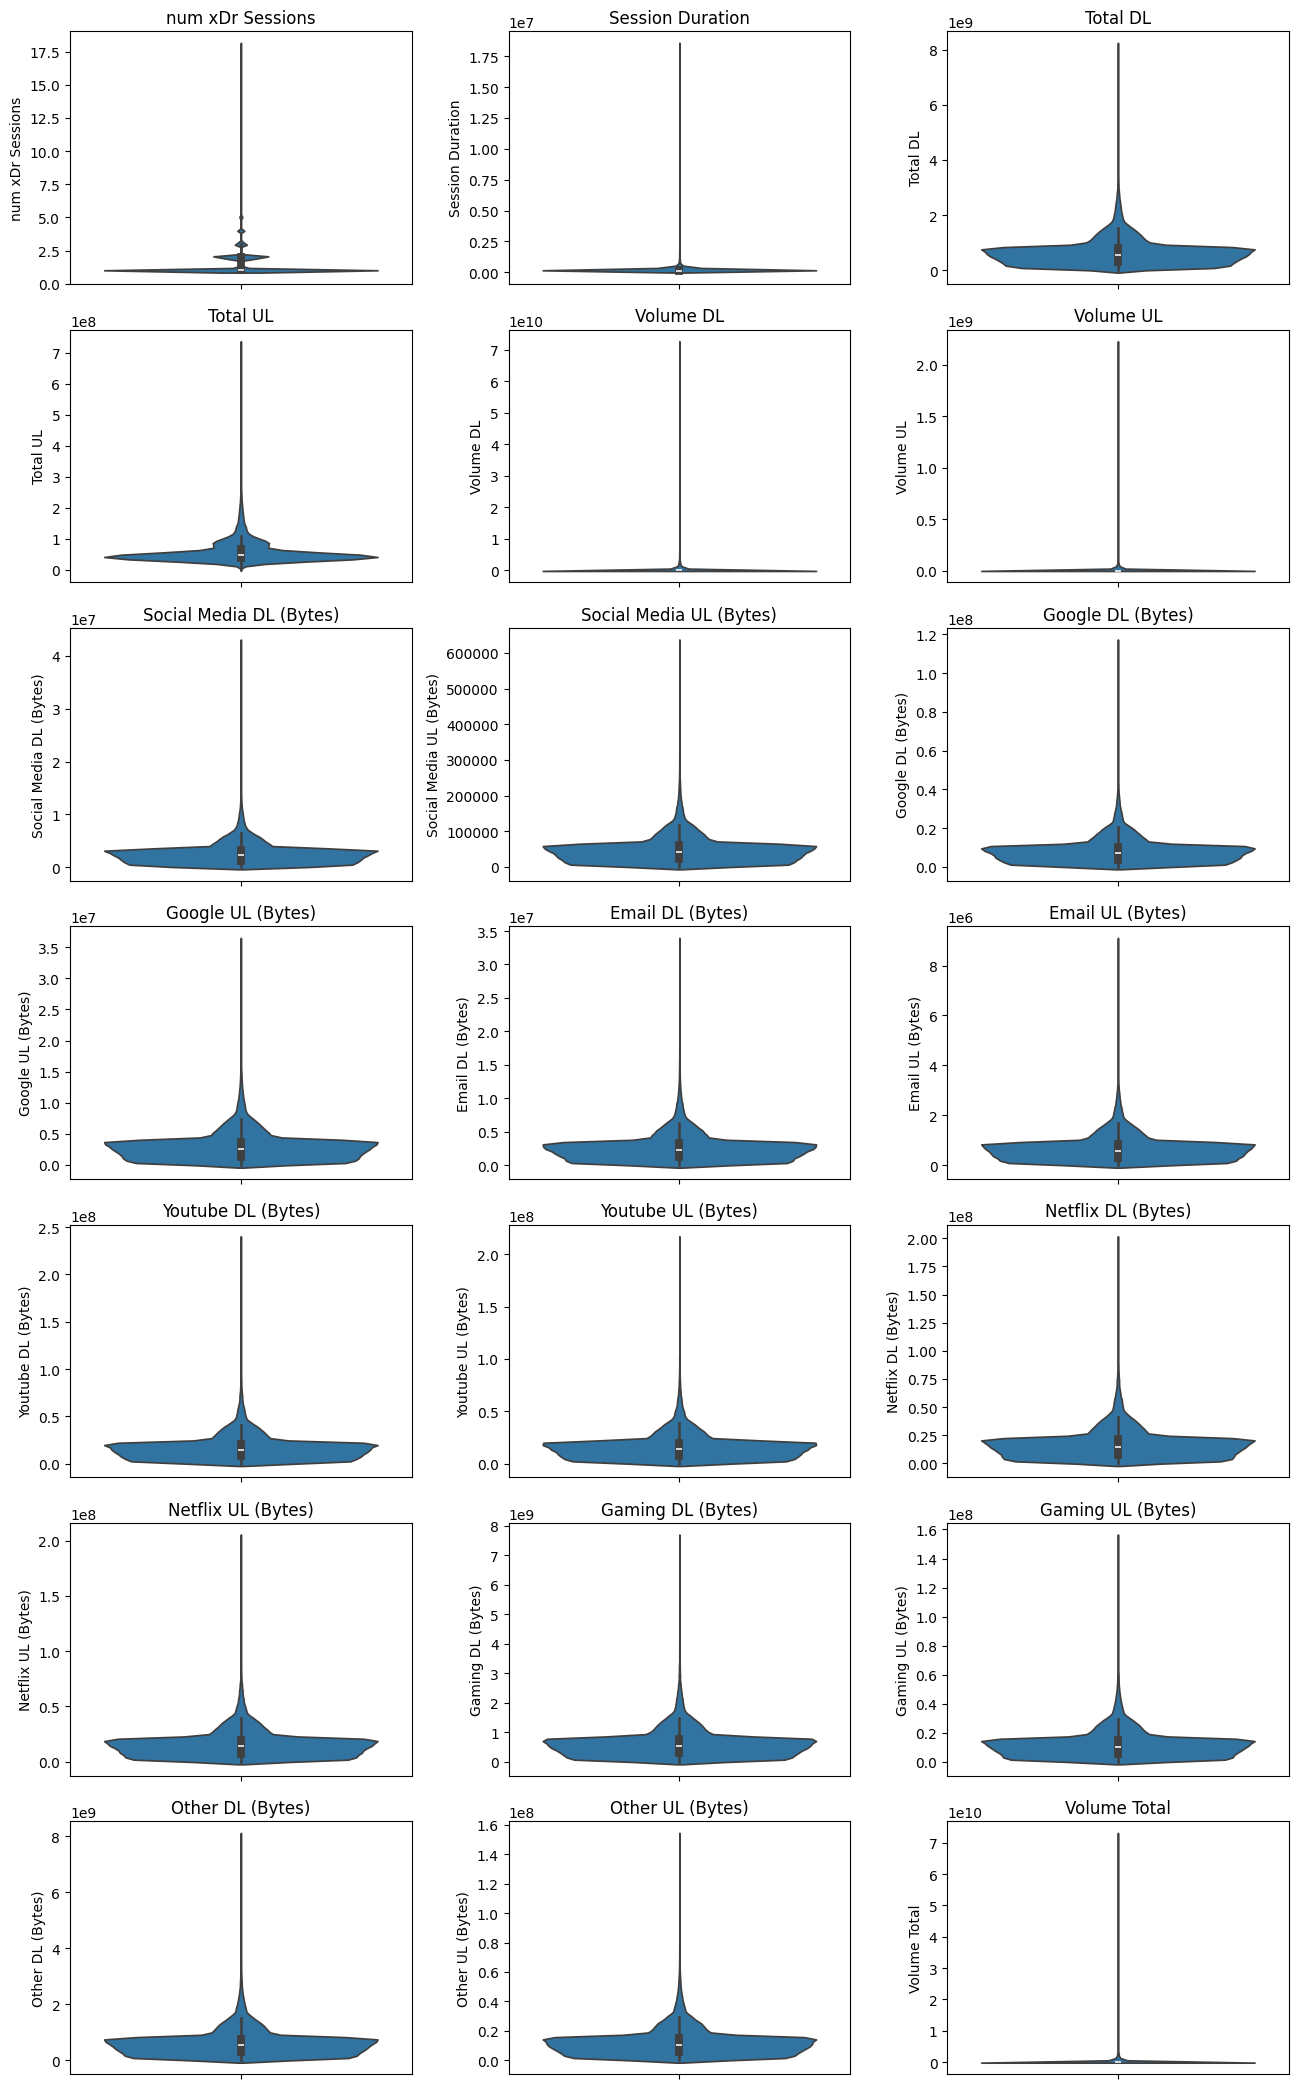

In [83]:
# Create subplots for drawing the box plots on one axis/image
fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, figsize=(13, num_rows * 3))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through columns to create violine plots
for idx, col_name in enumerate(user_behaviour.columns):
    if col_name in user_behaviour.columns:
        sns.violinplot(data=user_behaviour[col_name].astype(float), ax=axes[idx], orient='v')
        axes[idx].set_title(col_name)
    else:
        axes[idx].set_visible(False)  # Hide unused subplots

# Adjust spacing between subplots
plt.tight_layout()

The violin plot visualizes the distribution of various user behavior metrics. The insights are as follows:

- **Number of Sessions**: Most users have a moderate number of sessions, with significant outliers.
- **Session Duration**: Predominantly short sessions, with a few users having long sessions.
- **Total Download (DL) and Upload (UL) Data**: Majority of users have moderate data usage, with some heavy users.
- **Social Media, Google, Email, YouTube, Netflix, and Gaming Data Usage**: Varied engagement levels, with social media and YouTube showing wider distributions.
- **Other Data Usage and Total Volume**: Broad distribution reflecting diverse user activities.

